In [1]:
import sys

sys.path.append("../python")

In [2]:
import utils
reload(utils)

<module 'utils' from '../python/utils.py'>

In [3]:
emb_dict = utils.load_glove_embedding(utils.glove_embedding_path(25))

In [4]:
df = utils.load_all_tweets("../data/raw")

df.columns

Index(['id', 'lang', 'retweet_count', 'retweeted', 'text', 'truncated',
       'user/name'],
      dtype='object')

In [33]:
non_words  = '🤖👌➡️➡️👉🤖🎓🌐🚀💻\u2066😎\xa0👩\u200d🏫🎬💻🤖🌐🎓🚀\u2069™✨\U0001f9e0\u200b💪😍🤓🎉🚀🚀👋🔹👉👉✍🏽🌟✨🏆🎉👾😃✅'
non_words += '🌐☞☞😷\xa0\xa0\xa0👇😁😁😁👏——🔗📽️⚡️⚡️👍——🙏🏻🙌🏼❤️🚀🤓☞\xa0🍷👉🖥️💡🔸👏👏👏✌😉☞💵☺️🤜🤛💪🇬🇧🇨🇦🚀🎥😬👌🏼🍸🇬🇷💙☞\xa0😳👊👏📸▶️🎊'
non_words += '✨📊📉🌱💙📺😇\xa0—👁📊☞👉🏽🚀🌳👩🏽\u200d🏫🌊👨🏻\u200d🌾📚✏️💕\U0001f970🙋'
non_words += '🏻\u200d♂️🙌🏼👍🏼#\U0001f9fb💪➱➱–📝👊🏻🤷🏽\u200d♂️🍁✍️🤖\U0001f928📊📈✨🌟🏆🎉️⃣️⃣✔🔝《⚡⏱✈️🤔\U0001f928🤔¡⠀👉'
non_words += '\u2063\u2063\u2063\u2063☞–💻🤔☞🇯🇵🇮🇳👏🏽–🎉❤️🎓🏛️🤔✈️👉\u200a—\u200a✒️\xa0😍😬🌐😊😁😍👀☞❤️\U0001f929✨🔑🤖🤖🎓🏡🤝📽😎🚨🚨🤖🚖—》💥💥🔥🏙🔥'
non_words += '🔲´🖼😂😏💚💜💜🌍😲📒📋🥇👑💎\u3000📣🕴🚚💰🦈🙂💧🍅🍎🍐🍊🥑🍉🍇🏎📖💯💯🤣🐵📣🔖\U0001f9fe📑\xad\xad😆🎡📢📷💁😮😲😂😂😂😀🎂🥗🎙⚽„😭😭😭😭💃💫'
non_words += '😧⤵🍳🔟'
non_words = non_words.replace("#","").replace("&","")

pre_filters = non_words
post_filters='!"“”‘’’’’$%&()*+,-./:;=?@[\\]^_`{|}~…\t\n'

df["preproc_text"] = df["text"].apply(lambda x: utils.cleanup_text(x,pre_filters=pre_filters,post_filters=post_filters) )

In [34]:
df[["text","preproc_text"# ,"user/name"
    ,"truncated"
   ]].sample(20).values.tolist()

[['Sr. Data Scientist - Brainworks ( New York, NY, USA )  - [ 📋 More Info  https://t.co/iQFniYdezZ ] #AI #AiJobs… https://t.co/zEUNZuDqbl',
  'Sr Data Scientist Brainworks New York NY USA More Info <url> <hashtag> #ai <trunc> <url> <stop>',
  True],
 ['Your tip sheet to become the best data scientist, from the veteran himself Mr Joydeep Dam https://t.co/hd7G7DBO2B… https://t.co/aoTNGVJnRn',
  'Your tip sheet to become the best data scientist from the veteran himself Mr Joydeep Dam <trunc> <url> <stop>',
  True],
 ['LEARNING PATH: Python: Advanced Machine Learning with Python https://t.co/j0eh2vuU7C  #MachineLearning #DataScience #ad',
  'LEARNING PATH Python Advanced Machine Learning with Python <url> <hashtag> #machinelearning <hashtag> #datascience <hashtag> #ad <stop>',
  False],
 ['RT @machinelearnflx: Beginning Application Development with TensorFlow and Keras https://t.co/qZQehP8eaG  #MachineLearning #DataScience #ad',
  'RT <user> Beginning Application Development with TensorFlo

In [35]:
from keras.preprocessing.text import Tokenizer

In [36]:
tmptk = Tokenizer(filters="", # already applied
               lower=True,
               split=" ")
tmptk.fit_on_texts(df["preproc_text"].apply(lambda x: x.replace("RT <user>","")))

last = None
def duplicate(x):
    global last
    if x == last:
        return True
    last = x
    return False

df["sequences"] = tmptk.texts_to_sequences(df["preproc_text"])
duplicates = df["sequences"].sort_values().apply(duplicate)
duplicates.sort_index(inplace=True)

print("duplicated tweets: %d/%d %f" % ( duplicates.sum(), duplicates.shape[0], duplicates.sum()/duplicates.shape[0]) )

duplicated tweets: 0/23888 0.000000


In [37]:
df = df[~duplicates]

del df["sequences"]

In [38]:
df.to_hdf("../data/preproc/tweets.hd5","tweets")

In [39]:
tk = Tokenizer(filters="", # already applied
               lower=True,
               split=" ")
tk.fit_on_texts(df["preproc_text"])

In [40]:
list( tk.word_index.items() )[:20]

[('<hashtag>', 1),
 ('<stop>', 2),
 ('<user>', 3),
 ('<url>', 4),
 ('<trunc>', 5),
 ('rt', 6),
 ('the', 7),
 ('#machinelearning', 8),
 ('to', 9),
 ('and', 10),
 ('<number>', 11),
 ('#ai', 12),
 ('of', 13),
 ('in', 14),
 ('a', 15),
 ('for', 16),
 ('is', 17),
 ('gt', 18),
 ('learning', 19),
 ('on', 20)]

In [41]:
list( tk.word_index.keys() )[:20]

['<hashtag>',
 '<stop>',
 '<user>',
 '<url>',
 '<trunc>',
 'rt',
 'the',
 '#machinelearning',
 'to',
 'and',
 '<number>',
 '#ai',
 'of',
 'in',
 'a',
 'for',
 'is',
 'gt',
 'learning',
 'on']

Text(0,0.5,'fraction of words in corpus')

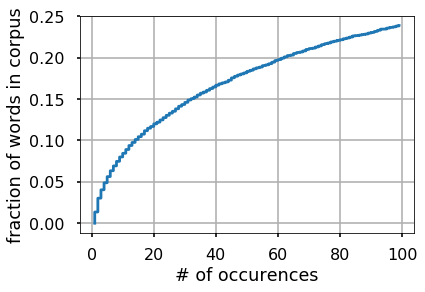

In [42]:
pdf = np.array(list(map(lambda x: x[1], sorted( tk.word_counts.items(), key=lambda x: x[1], reverse=True)))).astype(np.float)
cdf = pdf.cumsum()
# pdf //= cdf[-1]
cdf /= cdf[-1]
 
plt.plot( pdf[pdf<100],1-cdf[pdf<100] )
# plt.plot( cdf[pdf<10] )
plt.grid()
plt.xlabel("# of occurences")
plt.ylabel("fraction of words in corpus")


In [43]:
threshold = 0.90
max_words = int( np.ceil( (cdf>threshold).argmax() / 100) * 100 )

print( "Fraction of corpus: {}.\nFraction of dictionary: {} / {}.\nMax ingored occurence: {} " .format(threshold, max_words, len(tk.word_index), pdf[max_words]) )

Fraction of corpus: 0.9.
Fraction of dictionary: 2300 / 17831.
Max ingored occurence: 13.0 


In [44]:
# max_words = 1700
missing,hashtags = utils.get_uknown_words(tk.word_index,emb_dict,max_words)


In [45]:
list(filter(lambda x: "<" in x[0] or ">" in x[0],missing))


[('<stop>', 2), ('<trunc>', 5)]

In [46]:
len(missing), len(hashtags), max_words

(52, 208, 2300)

In [47]:
import re
non_words = map(lambda x: re.sub("\w","",x[0]), missing)

non_words = list(non_words)

''.join(non_words).replace("#","")

'<><>'

In [48]:
missing[:20]

[('<stop>', 2),
 ('<trunc>', 5),
 ('vanloon', 104),
 ('mikequindazzi', 183),
 ('tensorflow', 298),
 ('neurips', 424),
 ('machinelearning', 491),
 ('whova', 566),
 ('convolutional', 689),
 ('kirkdborne', 735),
 ('chatbots', 738),
 ('poptimize', 767),
 ('pulipaka', 848),
 ('chatbot', 961),
 ('nodexl', 994),
 ('datasciencectrl', 1099),
 ('interpretability', 1112),
 ('kdnuggets', 1157),
 ('v1', 1263),
 ('pytorch', 1267)]

In [49]:
sequences = tk.texts_to_sequences(df["preproc_text"])

In [50]:
id_to_hash = { x[1] : x[0] for x in hashtags }#+missing  }

def hashtags_from_seq(seq):   
    return filter(lambda y: y is not None, map(lambda x: id_to_hash.get(x,None), seq))
        
hastags_seqs = map(lambda x: " ".join(list(hashtags_from_seq(x))), sequences)    

with open("../data/preproc/hash_corpus.txt","w+") as co:
    co.write( "\n".join(list(filter(lambda x: len(x)>0,hastags_seqs))))